In [1]:
import os
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
path = 'C:/Users/User/Desktop/last sem/dataset'
os.chdir(path)
os.getcwd()

'C:\\Users\\User\\Desktop\\last sem\\dataset'

In [3]:
files = os.listdir(path)
print(files)

['.ipynb_checkpoints', '.vs', 'Data processing.py', 'face', 'face_100', 'face_300', 'feature extracted', 'generated_result', 'iris', 'iris_100', 'iris_300', 'Model training', 'model.png', 'multichannel', 'NEW_EYES_PROCESSING.ipynb', 'NEW_FACE_PROCESSING.ipynb', 'NEW_PALM_PROCESSING.ipynb', 'new_result', 'Note_CASIA-PalmprintV1.pdf', 'palmprint', 'palmprint_100', 'palmprint_300', 'processing code', 'template.py', 'X_eye.pickle', 'X_eye_fine.pickle', 'X_face.pickle', 'X_face_fine.pickle', 'X_palm.pickle', 'X_palm_fine.pickle', 'y_eye.pickle', 'y_eye_fine.pickle', 'y_face.pickle', 'y_face_fine.pickle', 'y_palm.pickle', 'y_palm_fine.pickle']


In [4]:
for filename in files:
    if filename == 'iris':
        os.chdir('C:/Users/User/Desktop/last sem/dataset/iris_300/CASIA-Iris-Thousand')
        cur_path = os.getcwd()
        print("current path file:", os.listdir())

current path file: ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', 

In [5]:
#from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils import array_to_img,img_to_array, load_img

In [6]:
#dataset = []
datasetL =[]
datasetR =[]
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
for i,user in enumerate(os.listdir(cur_path)):
    print(i,user)
    image_folder = os.path.join(cur_path,user)
    os.chdir(image_folder)
    for eye_images in os.listdir():
        #print(eye_images)
        if eye_images == "L":
            #print('do smth')
            final_Lpath = os.path.join(image_folder,eye_images)
            num_to_select = 5
            image_names = os.listdir(final_Lpath)
            random.shuffle(image_names)
            selected_images = image_names[:num_to_select]
            other_images = image_names[num_to_select+1:]
            #print(selected_images)
            for L_image in selected_images:
                L_imag = os.path.join(final_Lpath,L_image)
                imag = cv2.imread(L_imag,0)
                if imag is not None and imag.size > 0 :
                    eyes = eye_cascade.detectMultiScale(imag,1.3,10)
                    if eyes is ():
                        print('no eyes detected')
                    for (x, y, w, h) in eyes:
                        cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
                        roi = imag[y:y+h, x:x+w]  # crop the face region
                     
                    imag = cv2.resize(roi,(128,128))
                    imag = cv2.medianBlur(imag,5)
                    
                    #cv2.imshow('image',imag)
                    #cv2.waitKey(0)
                    #cv2.destroyAllWindows()
                    imag = np.expand_dims(imag,-1)
                    imag = imag.repeat(3, axis=-1)
                    #print(imag)
                    datasetL.append([imag,i])
                else:
                    print("invalid image")
                    imag = cv2.imread(other_images[0],0)
                    eyes = eye_cascade.detectMultiScale(imag,1.3,10)
                    if eyes is ():
                        print('no eyes detected')
                    for (x, y, w, h) in eyes:
                        cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
                        roi = imag[y:y+h, x:x+w]  # crop the face region
                    imag = cv2.resize(roi,(128,128))
                    imag = cv2.medianBlur(imag,5)
                    imag = np.expand_dims(imag,-1)
                    imag = imag.repeat(3, axis=-1)
                    #print(imag)
                    datasetL.append([imag,i])
                    
        if eye_images == "R":
                #print('do smth')
                #print('R')
                final_Rpath = os.path.join(image_folder,eye_images)
                num_to_select = 5
                image_names = os.listdir(final_Rpath)
                random.shuffle(image_names)
                selected_images = image_names[:num_to_select]
                other_images = image_names[num_to_select+1:]
                #print(selected_images)
                for R_image in selected_images:
                    R_imag = os.path.join(final_Rpath,R_image)
                    imag = cv2.imread(R_imag,0)
                    if imag is not None and imag.size > 0:
                        eyes = eye_cascade.detectMultiScale(imag,1.3,10)
                        if eyes is ():
                            print('no eyes detected')
                        for (x, y, w, h) in eyes:
                            cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
                            roi = imag[y:y+h, x:x+w]  # crop the face region
                        imag = cv2.resize(roi,(128,128))
                        imag = cv2.medianBlur(imag,5)
                       
                        imag = np.expand_dims(imag,-1)
                        imag = imag.repeat(3, axis=-1)
                        #print(imag)
                        datasetR.append([imag,i])
                    else:
                        print("invalid image")
                        imag = cv2.imread(other_images[0],0)
                        eyes = eye_cascade.detectMultiScale(imag,1.3,10)
                        if eyes is ():
                            print('no eyes detected')
                        for (x, y, w, h) in eyes:
                            cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
                            roi = imag[y:y+h, x:x+w]  # crop the face region
                        imag = cv2.resize(roi,(128,128))
                        imag = cv2.medianBlur(imag,5)
                        
                        imag = np.expand_dims(imag,-1)
                        imag = imag.repeat(3, axis=-1)
                        #print(imag)
                        datasetR.append([imag,i])

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:73: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:89: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:73: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:89: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\User\AppData\Local\Temp\ipykernel_15700\2669784790.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if eyes is ():
C:\Users\User\AppData\Local\Temp\ipykernel_15700\2669784790.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if eyes is ():
C:\Users\User\AppData\Local\Temp\ipykernel_15700\2669784790.py:73: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if eyes is ():
C:\Users\User\AppData\Local\Temp\ipykernel_15700\2669784790.py:89: SyntaxWarning: "is" 

0 000
no eyes detected
1 001
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
2 002
no eyes detected
no eyes detected
no eyes detected
no eyes detected
3 003
no eyes detected
no eyes detected
4 004
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
5 005
no eyes detected
no eyes detected
6 006
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
7 007
no eyes detected
no eyes detected
no eyes detected
no eyes detected
8 008
no eyes detected
no eyes detected
9 009
no eyes detected
10 010
no eyes detected
no eyes detected
11 011
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
12 012
13 013
no eyes detected
no eyes detected
14 014
no eyes detected
no eyes detected
no eyes detected
15 015
no eyes detected
no eyes detected
16 016
no eyes

no eyes detected
127 127
128 128
129 129
130 130
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
131 131
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
132 132
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
133 133
no eyes detected
no eyes detected
no eyes detected
134 134
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
135 135
no eyes detected
no eyes detected
no eyes detected
no eyes detected
136 136
137 137
no eyes detected
no eyes detected
no eyes detected
138 138
no eyes detected
no eyes detected
no eyes detected
139 139
no eyes detected
no eyes detected
140 140
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
141 

no eyes detected
227 227
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
228 228
no eyes detected
no eyes detected
no eyes detected
229 229
no eyes detected
230 230
no eyes detected
no eyes detected
231 231
no eyes detected
no eyes detected
no eyes detected
232 232
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
233 233
no eyes detected
no eyes detected
no eyes detected
234 234
235 235
no eyes detected
no eyes detected
no eyes detected
236 236
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
237 237
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
no eyes detected
238 238
239 239
no eyes detected
no eyes detected
no eyes detected
no eyes detected
240 240
no eyes detected
no eyes detected
no e

In [7]:
print(len(datasetL))
#dataset
print(len(datasetR))
                 
        

1500
1500


In [8]:
x_L = []
y_L = []
x_R = []
y_R = []

for features,label in datasetL:
    x_L.append(features)
    y_L.append(label)

for features,label in datasetR:
    x_R.append(features)
    y_R.append(label)  
    
print(y_L == y_R)

print(x_L[0].shape)
print(x_R[0].shape)
# concatenate left and right
#x_concat = np.column_stack([x_L, x_R])
x_concat = np.concatenate((x_L,x_R), axis = 1)

print(len(x_concat))
print(len(y_L))

True
(128, 128, 3)
(128, 128, 3)
1500
1500


In [9]:
#print(y)

In [10]:
print(x_concat.shape)
type(x_concat)

(1500, 256, 128, 3)


numpy.ndarray

In [11]:
y = np.array(y_L).reshape(-1,1)

In [12]:
print(y)

[[  0]
 [  0]
 [  0]
 ...
 [299]
 [299]
 [299]]


In [13]:
print(x_concat.shape)
print(y.shape)

(1500, 256, 128, 3)
(1500, 1)


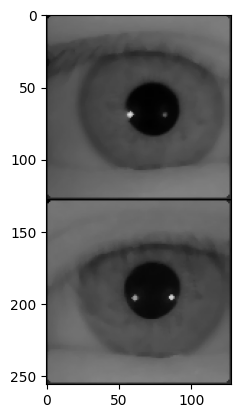

In [14]:
plt.imshow(x_concat[0])

In [15]:
os.chdir(path)
pickle_out = open("X_eye_300.pickle","wb")
pickle.dump(x_concat,pickle_out)
pickle_out.close()

pickle_out = open("y_eye_300.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
X.shape

In [ ]:
y.shape